## To compare and report period estimates for nicer and hxmt

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
he_df=pd.read_csv('/home/supremekai/thesis/J0243_6p6124/hxmt/final_all_hxmt_lc_periods_chisq_HE_manual.txt',sep='\t',comment="#")
me_df=pd.read_csv('/home/supremekai/thesis/J0243_6p6124/hxmt/final_all_hxmt_lc_periods_chisq_ME_manual.txt',sep='\t',comment="#")
le_df=pd.read_csv('/home/supremekai/thesis/J0243_6p6124/hxmt/final_all_hxmt_lc_periods_chisq_LE_manual.txt',sep='\t',comment="#")
nicer_df=pd.read_csv('/home/supremekai/thesis/J0243_6p6124/nicer/all_lc_periods_evt_files_bary_orbit_piexpiex_manual.txt', sep='\t',comment="#")


In [3]:
#individual checks
he_df[he_df['Date']==20160]['PErr']

17    0.000268
Name: PErr, dtype: float64

In [4]:

me_df.head()
le_df.head()


,LC_File_Path,Period,Chi-square,Date,freq,PErr
0,/home/iist/aniket_data/hxmt_raw_data/decompres...,9.79506,10730.0,20152,102.092279,0.000034
1,/home/iist/aniket_data/hxmt_raw_data/decompres...,9.79503,10470.0,20152,102.092592,0.000048
2,/home/iist/aniket_data/hxmt_raw_data/decompres...,9.79499,15840.0,20153,102.093009,0.000040
3,/home/iist/aniket_data/hxmt_raw_data/decompres...,9.79502,12000.0,20153,102.092696,0.000033
4,/home/iist/aniket_data/hxmt_raw_data/decompres...,9.79482,10210.0,20154,102.094781,0.000022


In [5]:
nicer_df.head()

,LC_File_Path,Period,Chi-square,TSTARTI,freq,PErr
0,6050390227,9.80076,21747.14844,20112,102.032904,0.000006
1,6050390228,9.80069,14779.15527,20113,102.033632,0.000010
2,6050390229,9.80057,20520.34570,20114,102.034882,0.000002
3,6050390230,9.80043,19369.66602,20115,102.036339,0.000024
4,6050390231,9.80052,24025.91992,20116,102.035402,0.000021


In [6]:
he_df = he_df[he_df['PErr'] != 0]
me_df = me_df[me_df['PErr'] != 0]
le_df = le_df[le_df['PErr'] != 0]

sigmaP/P^2 = sigma f: Error in frequency

In [7]:
Nicer_freqErr=1000*nicer_df['PErr']/nicer_df['Period']**2

he_df_freqErr=1000*he_df['PErr']/he_df['Period']**2

me_df_freqErr=1000*me_df['PErr']/me_df['Period']**2

le_df_freqErr=1000*le_df['PErr']/le_df['Period']**2


<ErrorbarContainer object of 3 artists>

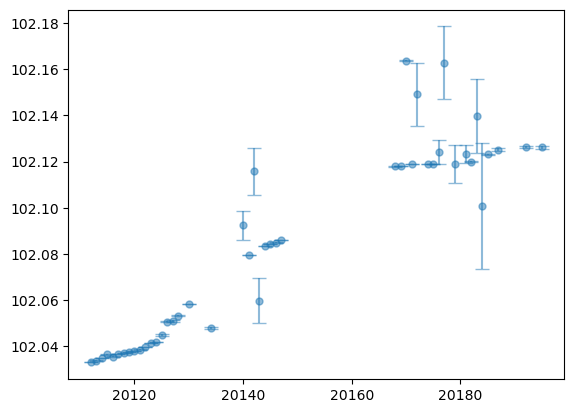

In [8]:
plt.errorbar(nicer_df['TSTARTI'],nicer_df['freq'],yerr=Nicer_freqErr, capsize=5,markersize=5,fmt="o", alpha=0.5)

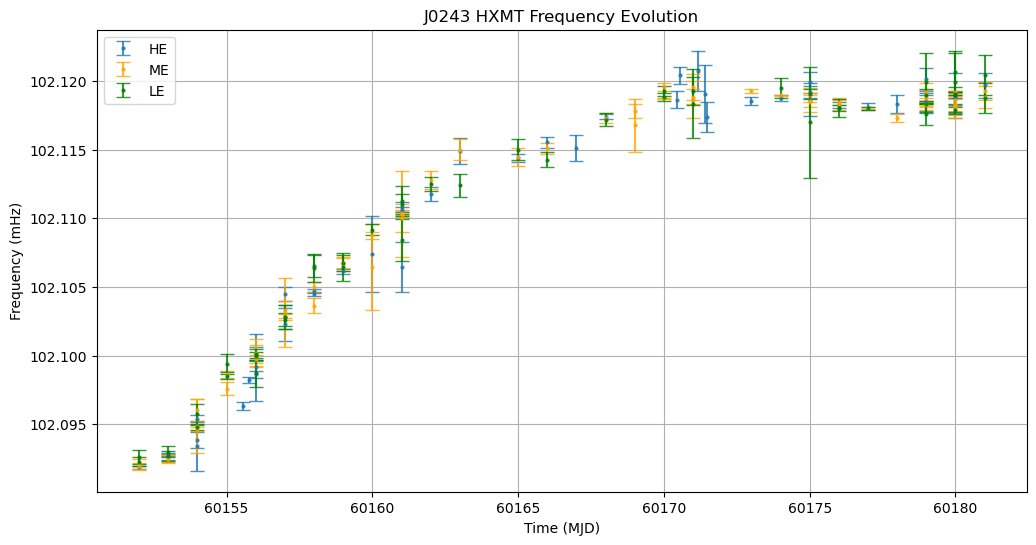

In [17]:
plt.figure(figsize=(12,6))

plt.errorbar(he_df['Date']+40000,1000/he_df['Period'],yerr=he_df_freqErr, capsize=5,markersize=2,fmt="o", alpha=0.8, label="HE")
plt.errorbar(me_df['Date']+40000,1000/me_df['Period'],yerr=me_df_freqErr, capsize=5,markersize=2,fmt="o", alpha=0.8,label="ME",color='orange') 
plt.errorbar(le_df['Date']+40000,1000/le_df['Period'],yerr=le_df_freqErr, capsize=5,markersize=2,fmt="o", alpha=0.8, label="LE",color='green')
#plt.errorbar(nicer_df['TSTARTI']+40000,nicer_df['freq'],yerr=Nicer_freqErr, capsize=2,markersize=2,fmt="o", alpha=0.8, color='red',label="NICER")

plt.legend()
plt.grid()
plt.ylabel('Frequency (mHz)')
plt.xlabel('Time (MJD)')
plt.title('J0243 HXMT Frequency Evolution')

#plt.xlim(60150,60184)
#plt.ylim(102.1,102.2)
plt.show()

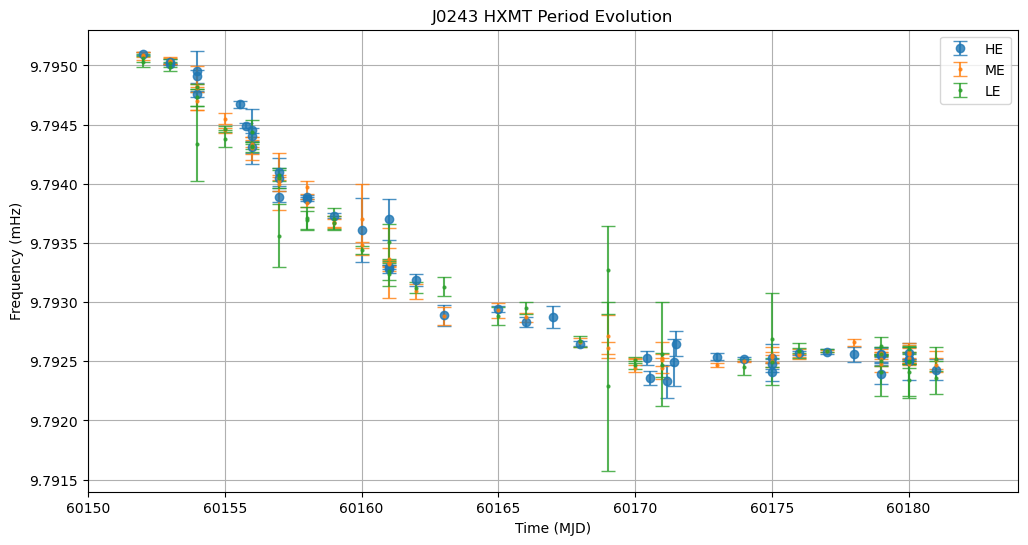

In [140]:
plt.figure(figsize=(12,6))

plt.errorbar(he_df['Date']+40000,he_df['Period'],yerr=he_df['PErr'], capsize=5,markersize=6,fmt="o", alpha=0.8, label="HE")
plt.errorbar(me_df['Date']+40000,me_df['Period'],yerr=me_df['PErr'], capsize=5,markersize=2,fmt="o", alpha=0.8,label="ME") 
plt.errorbar(le_df['Date']+40000,le_df['Period'],yerr=le_df['PErr'], capsize=5,markersize=2,fmt="o", alpha=0.8, label="LE")
#plt.errorbar(nicer_df['TSTARTI'],nicer_df['freq'],yerr=Nicer_freqErr, capsize=5,markersize=2,fmt="o", alpha=0.8, ecolor='red',label="NICER")

plt.legend()
plt.grid()
plt.ylabel('Frequency (mHz)')
plt.xlabel('Time (MJD)')
plt.title('J0243 HXMT Period Evolution')

plt.xlim(60150,60184)
#plt.ylim(102.1,102.2)
plt.show()

In [15]:
# plt.scatter(he_df['Date'],he_df['Chi-square'])
# plt.scatter(me_df['Date'],me_df['Chi-square'])
# plt.scatter(le_df['Date'],le_df['Chi-square'])
# plt.scatter(nicer_df['TSTARTI'],nicer_df['Chi-square'])
# plt.xlim(20150,20189)
# # plt.ylim(200,2000)